In [1]:
import numpy as np
from specializeGraph import *

In [24]:
A = np.array([[0,1,0,0,0,1,0,0],
              [1,0,0,0,0,0,0,1],
              [1,1,0,1,1,0,0,0],
              [0,0,1,0,1,0,0,0],
              [0,0,1,1,0,0,0,0],
              [0,0,0,0,0,0,1,0],
              [0,0,0,0,1,1,0,1],
              [0,0,0,0,0,0,1,0]
             ])
sA = specializeGraph(A,[0,1])

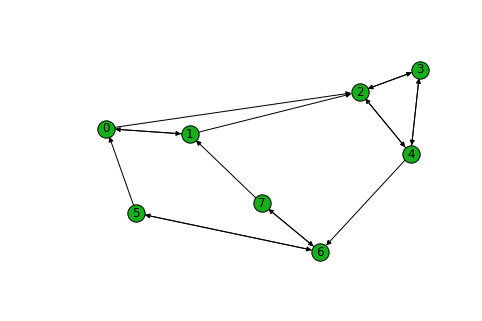

In [41]:
drawGraph(A)

In [25]:
v = eigCent(A)
sv = eigCent(sA)

In [26]:
print(v)

[1.        +0.j 1.        +0.j 3.94619793+0.j 3.31903416+0.j
 3.31903416+0.j 1.18895972+0.j 2.60258494+0.j 1.18895972+0.j]


In [27]:
print(sv)

[1.        +0.j 1.        +0.j 1.97309897+0.j 1.65951708+0.j
 1.65951708+0.j 0.59447986+0.j 1.30129247+0.j 0.59447986+0.j
 1.97309897+0.j 1.65951708+0.j 1.65951708+0.j 0.59447986+0.j
 1.30129247+0.j 0.59447986+0.j 1.97309897+0.j 1.65951708+0.j
 1.65951708+0.j 0.59447986+0.j 1.30129247+0.j 0.59447986+0.j
 1.97309897+0.j 1.65951708+0.j 1.65951708+0.j 0.59447986+0.j
 1.30129247+0.j 0.59447986+0.j]


In [28]:
sv[2:5] + sv[14:17]

array([3.94619793+0.j, 3.31903416+0.j, 3.31903416+0.j])

In [29]:
sv[5:8] + sv[17:20]

array([1.18895972+0.j, 2.60258494+0.j, 1.18895972+0.j])

In [30]:
print(sA)

[[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 

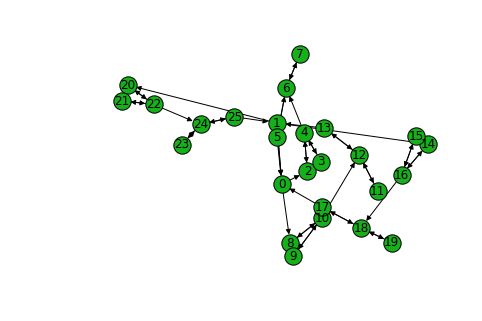

In [40]:
drawGraph(sA)

In [25]:
nodes = []
for j in np.where(sA[1,:]==1)[0]:
    nodes.append([j,j+1])

In [26]:
v = eigCent(A)
u = eigCent(sA)
print(v[6:])
copies = np.array([u[c] for c in nodes]).sum(axis=0)
print(copies)

[2.84886427+0.j 2.52127364+0.j]
[2.84886427+0.j 2.52127364+0.j]


In [34]:
In = A[[2,3,4,5],:][:,[2,3,4,5]]
np.linalg.inv(spectralRad(A)*np.eye(4) - In)

array([[0.91291607+0.j, 0.54087259+0.j, 0.        +0.j, 0.        +0.j],
       [0.54087259+0.j, 0.91291607+0.j, 0.        +0.j, 0.        +0.j],
       [0.83341574+0.j, 0.49377128+0.j, 0.91291607+0.j, 0.54087259+0.j],
       [0.49377128+0.j, 0.29254316+0.j, 0.54087259+0.j, 0.91291607+0.j]])

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 

In [44]:
A = np.array([[0,1,0,0],
              [1,0,1,0],
              [1,0,0,1],
              [1,0,0,0]])
e = np.linalg.eigvals(A)
print((e*e.conjugate())**.5)

[1.46557123+0.j 1.        +0.j 0.82603136+0.j 0.82603136+0.j]


In [45]:
np.linalg.inv(A)

array([[ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [-0.,  1., -0., -1.],
       [-0., -0.,  1., -1.]])

In [88]:
from numpy.linalg import inv

In [125]:
rho = 2
U = np.array([[0,1],[1,0]])

T = np.array([[0,1,0,0,0,0],
              [1,0,0,0,0,0],
              [0,0,0,1,0,0],
              [0,0,1,0,0,0],
              [0,1,1,0,0,1],
              [0,0,0,0,1,0]
             ])

Tinv = inv(rho*np.eye(6)-T)

Ytu = np.array([[1,0],
                [0,1],
                [0,0],
                [1,0],
                [0,0],
                [0,0]
               ])

Yzt = np.array([[0,0,0,0,0,0],
                [0,0,0,0,1,0],
                [0,0,0,0,0,1]
               ])
                
Z = np.array([[0,0,1],
              [1,0,0],
              [0,1,0]
             ])

Zinv = inv(rho*np.eye(3) - Z)
                
C = np.array([[0,1],[1,0]])
Cinv = inv(rho*np.eye(2)-C)

Y1u = np.array([[0,1],
                [1,0]])
Y2u = np.array([[0,0],
                [1,0]])
Y31 = np.array([[0,1],
                [0,0]])
Y32 = np.array([[1,0],
                [0,0]])
Yzc = np.array([[0,0],
                [1,0],
                [0,1]
               ])

P1 = Zinv.dot(Yzc.dot(Cinv.dot(Y32.dot(Cinv.dot(Y2u)))))
P2 = Zinv.dot(Yzc.dot(Cinv.dot(Y31.dot(Cinv.dot(Y1u)))))

print(Zinv.dot(Yzt.dot(Tinv.dot(Ytu))))
print(P1+P2)





[[0.12698413 0.12698413]
 [0.28571429 0.28571429]
 [0.25396825 0.25396825]]
[[0.19047619 0.06349206]
 [0.42857143 0.14285714]
 [0.38095238 0.12698413]]


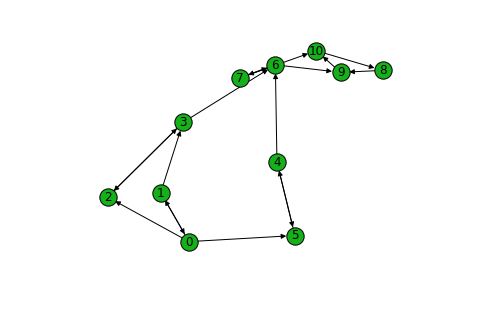

In [126]:
A = np.zeros((11,11))
A[0:2,0:2] = U
A[2:8,2:8] = T
A[8:,8:] = Z
A[2:8,0:2] = Ytu
A[8:,2:8] = Yzt
drawGraph(A)

In [58]:
P = np.eye(5)
for i in range(20):
    P = P.dot(rho*np.eye(5) - A)
    print(P)

[[ 1. -1.  0.  0.  0.]
 [-1.  1.  0.  0.  0.]
 [-1.  0.  1. -1.  0.]
 [-1.  0. -1.  1.  0.]
 [ 0. -1. -1. -1.  1.]]
[[ 2. -2.  0.  0.  0.]
 [-2.  2.  0.  0.  0.]
 [-1.  1.  2. -2.  0.]
 [-1.  1. -2.  2.  0.]
 [ 3. -2. -1. -1.  1.]]
[[ 4. -4.  0.  0.  0.]
 [-4.  4.  0.  0.  0.]
 [-2.  2.  4. -4.  0.]
 [-2.  2. -4.  4.  0.]
 [ 7. -6. -1. -1.  1.]]
[[  8.  -8.   0.   0.   0.]
 [ -8.   8.   0.   0.   0.]
 [ -4.   4.   8.  -8.   0.]
 [ -4.   4.  -8.   8.   0.]
 [ 15. -14.  -1.  -1.   1.]]
[[ 16. -16.   0.   0.   0.]
 [-16.  16.   0.   0.   0.]
 [ -8.   8.  16. -16.   0.]
 [ -8.   8. -16.  16.   0.]
 [ 31. -30.  -1.  -1.   1.]]
[[ 32. -32.   0.   0.   0.]
 [-32.  32.   0.   0.   0.]
 [-16.  16.  32. -32.   0.]
 [-16.  16. -32.  32.   0.]
 [ 63. -62.  -1.  -1.   1.]]
[[  64.  -64.    0.    0.    0.]
 [ -64.   64.    0.    0.    0.]
 [ -32.   32.   64.  -64.    0.]
 [ -32.   32.  -64.   64.    0.]
 [ 127. -126.   -1.   -1.    1.]]
[[ 128. -128.    0.    0.    0.]
 [-128.  128.    0.    0.    0

In [3]:
import pickle

In [7]:
def getA(i):
    f = open('UVMproject/samples/celegans_samp_ '+ str(i) +' .csv','rb')
    l = f.read().split('\n')
    l = [s.split(',') for s in l[1:-1]]
    l = [(int(s[0]),int(s[1])) for s in l]
    G = nx.DiGraph(l)
    return nx.adjacency_matrix(G).toarray()

In [35]:
f = open("UVMproject/gen_base/base42.pkl",'rb')
Bases = pickle.load(f)
f.close()
A = getA(42)
S = np.loadtxt(open("UVMproject/gen_celegans/gen_celegans"+str(42)+".csv",'rb'),delimiter=',')


In [36]:
for b in Bases[:-1]:
    A = specializeGraph(A,list(b))
    
np.sum(A-S)

0.0

In [16]:
S = np.loadtxt(open("UVMproject/gen_celegans/gen_celegans"+str(800)+".csv",'rb'),delimiter=',')

In [37]:
G = nx.DiGraph(S)
